# UFO

<font color='#660066'>
   
### Table of Contents

- [Data](#Data)
    - [Scraping from UFORC](#Scraping-from-UFORC)
    - [Data Format](#data_format)
    - [Cleaing Data](#cleaning_pdata)
- [Basic anlayis](#Basic-Anylsis)
- [Milestone 3](#milestones)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from lib.cleaning import clean_data, \
                        clean_duration_get_min
from lib.nuforc_analysis import *
from wordcloud import WordCloud
import pickle
from ipywidgets import interactive, IntSlider, interact, fixed

data_folder = "data/"

file_url_list = data_folder+'full_list_of_urls.json'

report_file = 'all_sightings.csv'

df_reports = pd.read_csv(data_folder+report_file)
df_reports.sample(1).head()

df_reports, df_madarr = clean_data(df_reports)

In [2]:
df_spike = df_reports[['Occurred']].copy()
df_spike = df_spike[(df_spike.Occurred.dt.year > 2003)]
df_spike = df_spike[(df_spike.Occurred.dt.year < 2008)]

#df_spike = df_spike[(df_spike.Occurred.dt.day == day)]
index_list = df_spike[df_spike.Occurred.isna()].index
df_spike = df_spike.dropna()
df_spike['day'] = df_spike.Occurred.map(lambda x: x.strftime('%Y-%m-%d'))
plotting = df_spike.groupby(by='day').count()

In [4]:
import pickle

In [5]:
pickle.dump( plotting, open( "plotting.p", "wb" ) )

In [ ]:
#fig, ax = plt.subplots(figsize=(15, 6))
#plt.bar(plotting.index, plotting.Occurred)
#plt.xlabel("Day in {}".format(df_spike.Occurred.iloc[1].strftime('%B')))
#plt.ylabel('Occurrance')
plt.plot(plotting.Occurred)
plt.show()

<font color='#660066'>

## Occurance analyis and peak detection

We are searching for peaks in the data to see if there are some seasonal data correlation and if we can relate specific weather events (storms, tornados, earthquakes) to peaks which pop out of the main distribution of occurances.

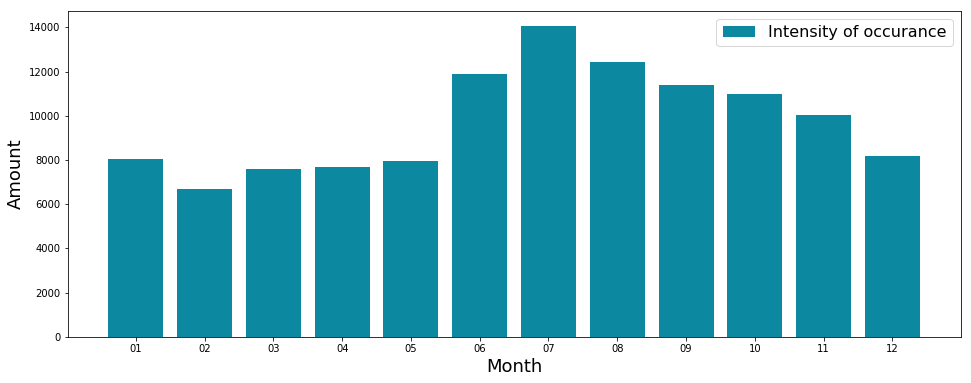

In [8]:
color_global = '#0c89a0'
def peaks_over_months(df):
    """
    Create a barplot for occurred sightings per month
    """
    df_peaks = df[['Occurred']].copy()
    df_peaks = df_peaks[(df_peaks.Occurred.dt.year > 1900)]
    index_list = df_peaks[df_peaks.Occurred.isna()].index
    df_peaks = df_peaks.dropna()
    df_peaks['year_month'] = df_peaks.Occurred.map(lambda x: x.strftime('%m'))
    plotting_times = df_peaks.groupby(by='year_month').count()

    fig, ax = subplots(figsize=(16,6))
    plt.bar(plotting_times.index, plotting_times.Occurred, color=color_global)
    plt.legend(['Intensity of occurance'], fontsize=16)
    plt.xlabel('Month', fontsize=18)
    plt.ylabel('Amount', fontsize=18)
    plt.show()
peaks_over_months(df_reports)

<font color='#660066'>


### Analysis
This plot shows the amount of reported occurances per month from 1900-2018.
We can see a very clear trend that during the summer months when there is an increase in submitted reports.
This can be reasoned with very logicaly, because during warmer periods people tend to spend more time outside, thus have a higher probability of making a sighting of a UFO.

But we see a clear increase in July, thus we will be investigating this month more, by plotting the reports from July over the time frame 1900 to 2018.

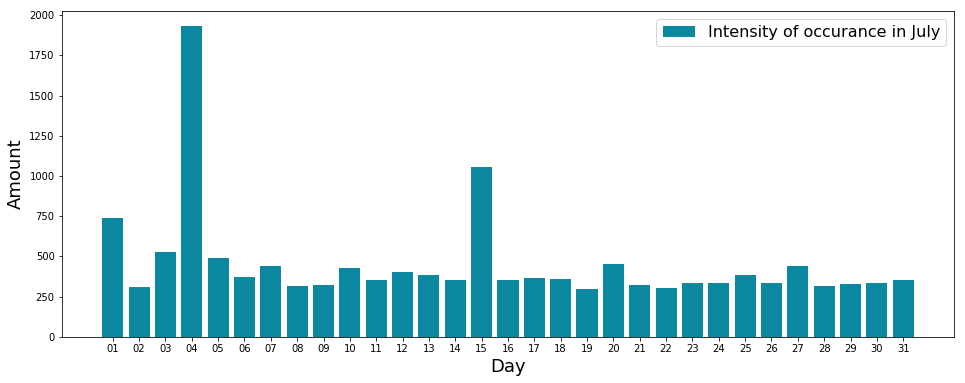

In [32]:
def get_plot_july(df):
    df_july = df[['Occurred']].copy()
    df_july = df_july[(df_july.Occurred.dt.year > 1900)]
    df_july = df_july[(df_july.Occurred.dt.month == 7)]
    index_list = df_july[df_july.Occurred.isna()].index
    df_july = df_july.dropna()
    df_july['days'] = df_july.Occurred.map(lambda x: x.strftime('%d'))
    july_plotting_times = df_july.groupby(by='days').count()

    fig, ax = subplots(figsize=(16,6))
    plt.bar(july_plotting_times.index, july_plotting_times.Occurred, color=color_global)
    plt.legend(['Intensity of occurance in July'], fontsize=16)
    plt.xlabel('Day', fontsize=18)
    plt.ylabel('Amount', fontsize=18)
    plt.show()
get_plot_july(df_reports)

<font color='#660066'>


## Analysis
Now, here things start to become very interesting. We can quite obviously see an increase for the 4th of July, as a lot of sightings might be connected with the fireworks in the US. 

Though, another very clear increase is on the 15th of July, but after a google query, no specific occurance in the month of July was found. Thus, an investigation of the 15th of July over the years occurs. What is more interesting, is that the increase on the 15th day of the month can be seen across multiple months.

In [9]:
def get_data_for_months(df):
    df_month = df[['Occurred']].copy()
    df_month = df_month[(df_month.Occurred.dt.year > 1900)]
    months = []
    for i in range(1,13):
        df_month_iter = df_month[(df_month.Occurred.dt.month == i)].copy()
        index_list = df_month_iter[df_month_iter.Occurred.isna()].index
        df_month_iter = df_month_iter.dropna()
        df_month_iter['days'] = df_month_iter.Occurred.map(lambda x: x.strftime('%d'))
        each_month = df_month_iter.groupby(by='days').count()
        each_month['month'] = df_month_iter.Occurred.iloc[1].strftime('%B')
        months.append(each_month)
    return months

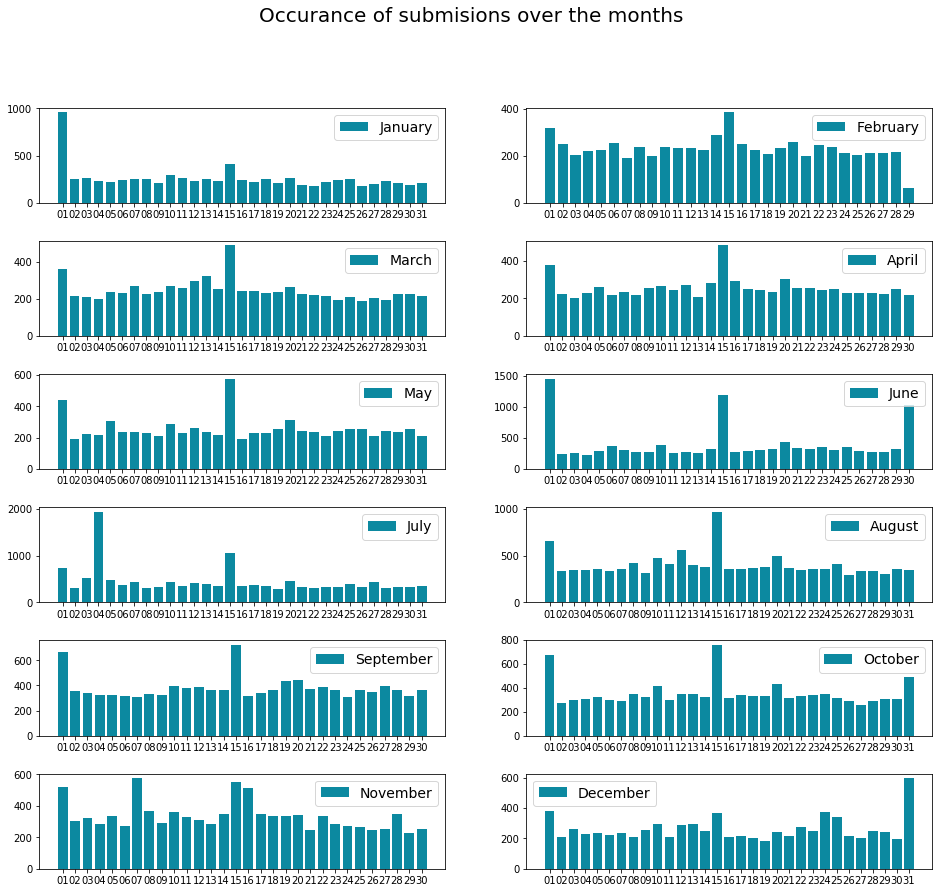

In [55]:
def plot_for_each_month(months):
    
    figs, axis = subplots(nrows=6,ncols=2,figsize=(16,14))
    
    month = 0
    for row in range(6):
        for col in range(2):
            axis[row, col].bar(months[month].index, months[month].Occurred, color = color_global)
            axis[row, col].legend(['{}'.format(months[month].month.iloc[1])], fontsize=14)
            month += 1
    figs.suptitle('Occurance of submisions over the months', fontsize=20)
    plt.subplots_adjust(hspace=0.4)       
    plt.show()

plot_for_each_month(get_data_for_months(df_reports))

<font color='#660066'>

We can see a very clear trend across all months, that during the 15th day of the month there is a sudden increase in occured reportings of UFOs. Also, in most months there is a peak on the first day of the month. And in some months there are also other peaks, which most of the time can be explained due to holidays and such events.

Now to look into the 15th of July specifically over the years.

In [2]:
# This was just for finding the spike myself, not necessary
spike_reports = df_reports[['Occurred','Reported','State', 'Shape', 'Summary','link']].copy()
spike_reports = spike_reports[(spike_reports.Occurred.dt.year == 2006)]
spike_reports = spike_reports[(spike_reports.Occurred.dt.month == 10)]
spike_reports = spike_reports[(spike_reports.Occurred.dt.day == 1)]
spike_reports.sort_values('State')

NameError: name 'df_reports' is not defined



### From 2004 to 2007

15th April 2004, Florida sightings connected with rocket launch https://en.wikipedia.org/wiki/List_of_Atlas_launches_(2000%E2%80%932009)

26th June 2004, space debris entering atmosphere

21st august 2004 and 31st october 2004, 30th September 2005, https://www.youtube.com/watch?v=UE_hpI5K8fY, almost all reports over the same time, in the same location https://en.wikipedia.org/wiki/Black_triangle_(UFO)%93_Tinley_Park_Lights, https://www.huffingtonpost.com/reboot-illinois/crazy-ufo-sightings-in-il_b_7654820.html?guccounter=1

31st August 2004, the missile launch https://www.space.com/299-mystery-cloud-appears-eastern-canada.html

29th of April 2005, titan IV misile launch https://en.wikipedia.org/wiki/Titan_IV

15th of May 2005, reports from all over the place, no correlation

29th April, a lot of reports from Portaland, Oregon, no seeming reason

1st of October 2006, reports from Colorado and New Mexico, check weather

28th of November 2006, often described as fireball, possible explanation meteor event https://www.amsmeteors.org/members/imo_view/event/2006/448

16th of December 2006, possible explanation: meteor event https://www.amsmeteors.org/members/imo_view/event/2006/492

19-20th of June 2007, possible explanation, ISS docking of a cargo ship https://twitter.com/shuttlealmanac/status/744654510778245121

12th of August 2007, look into weather

12th of December 2007, Atlas rocket fuel dump https://britastro.org/node/5886

<font color='#660066'>

We see no particaular increase on the 15th of July over the years, so there might be some other reason for this phenomena.

<font color='#660066'>

Thus, we're going to do some more indepth analysis on these reports - text analysis, time of report, duration.

<font color='#660066'>

And again, nothing specific can be noticed for the 15th day of the month.

Thus, exctracting the reports of the 15th day of the month.

Let's see if the occurrance of the report and the reporting is somehow correlated with the reporting on the 15th, some sort of a bias?

In [14]:
def occurance_report_difference(df):
    df_dummy = df[['Duration', 'Occurred', 'Reported', 'Shape', 'nuforc_note']]
    df_dummy = df_dummy[(df_dummy.Occurred.dt.year > 1964)]
    df_dummy['difference'] = df_dummy.Reported - df_dummy.Occurred
    df_dummy.difference = df_dummy.difference.dt.total_seconds()/3600
    df_dummy = df_dummy[(df_dummy.difference > 48)]
    df_dummy['day'] = df_dummy.Occurred.dt.day
    seperate_days_diff = []
    for days in range(1, 32):
        seperate_days_diff.append(df_dummy.difference[(df_dummy.Occurred.dt.day == days)].values)
    return seperate_days_diff
seperate_days_diff = occurance_report_difference(df_reports)

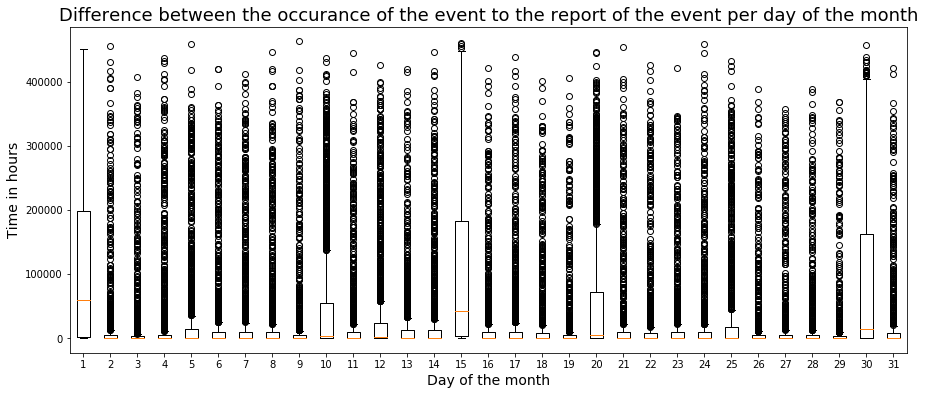

In [15]:
def plot_occur_report_difference(data, showfliers=True):
    fig, ax = plt.subplots(figsize=(15, 6))
    ax = plt.boxplot(x = data, showfliers=showfliers)
    plt.xlabel('Day of the month', fontsize=14)
    plt.ylabel('Time in hours', fontsize=14)
    plt.title('Difference between the occurance of the event to the report of the event per day of the month',
              fontsize=18)

    plt.show()
plot_occur_report_difference(occurance_report_difference(df_reports))

We see that we have some suspicious dates, where the mean is higher than for the other ones, these days fall on 'round' numbers, thus we propose that these dates are artificially inflated. In other words, UFO reporters which submit their reports after a longer time will have a bias towards round dates {ref: Huttenlocher (1990)}
To test this further we will do Kolmogorov-Smirnov test on these dates to see if their empirical distribution matches the distribution of the other dates.

In [16]:
seperate_days_diff = occurance_report_difference(df_reports)
new = np.concatenate(seperate_days_diff).ravel()

In [17]:
new.shape

(48593,)

In [18]:
def get_distribution_data(data):
    all_days = list(range(1,32))
    suspicios_days = [1,5,10,15,20,25,30]
    for day in suspicios_days:
        all_days.remove(day)
    data_all_days = []
    data_suspicios_days = []
    for day in all_days:
        data_all_days.append(data[day-1])
    for day in suspicios_days:
        data_suspicios_days.append(data[day-1])
    data_all_days = np.concatenate(data_all_days).ravel()
    data_suspicios_days = np.concatenate(data_suspicios_days).ravel()
    return data_all_days, data_suspicios_days
data_all_days, data_suspicios_days = get_distribution_data(occurance_report_difference(df_reports))

In [20]:
from scipy.stats import f_oneway, ks_2samp


def kolmogorov_smirnov(data1, data2):
    """
    return True is at least one mean is different from the other
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html#scipy.stats.ks_2samp
    """
    statistic, pvalue = ks_2samp(data1, data2)

    print("Kolmogorov_Smirnov Statistic " + str(statistic) + " and p-value " + str(pvalue))
    if pvalue < 0.05:
        return True
    else:
        return False


In [21]:
kolmogorov_smirnov(data_all_days, data_suspicios_days)

Kolmogorov_Smirnov Statistic 0.30862854553990543 and p-value 0.0


True

In [532]:
#for day in range(31):
 #   print(day+1, 'mean:', seperate_days_diff[day].mean(), 'variance:', seperate_days_diff[day].var())

<font color='#660066'>
    
We are looking into the significance of the time differenece between the occurred event, its reporting and the time of the day. Our theory is that the longer a person might wait for submitting his result, the higher a probability for that person to forget when he witnessed the sighting, and, thus, create a bias towards the middle or the beginning of the month.

Hereby, we form a null hypothesis, that there is no correlation between the difference of occurance of the sighting, its reporting and the day of the month at which the report has been submitted.

In [8]:
df_15th_full = df_reports[['Duration', 'State', 'Occurred', 'Reported', 'Shape', 'Summary', 'nuforc_note']].copy()
df_15th_full = df_15th_full[(df_15th_full.Occurred.dt.year > 1900)]
df_15th_full = df_15th_full[(df_15th_full.Occurred.dt.day == 15)]
df_15th_full.shape

(7962, 7)

In [9]:
summaries_15th = df_15th_full['Summary'].values
all_summaries = df_reports['Summary'].values

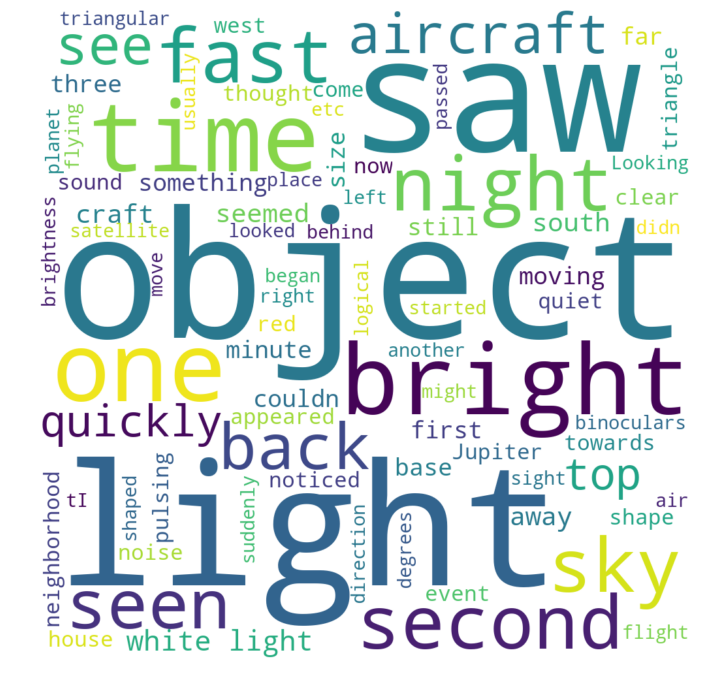

In [28]:
text_15th = str(summaries_15th)
x, y = np.ogrid[:1000, :1000]
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wc = WordCloud(background_color="white", repeat=False, width=1000, height=1000, max_words=80)
wc.generate(text_15th)
plt.figure(figsize=(12, 12))
plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()

<font color='#660066'>

We noticed a very interesting occurance on the 15th day of the month from 1900. By making a wordcloud plot we could see that the word 'friend' appears. After going through all of the other days we noticed that the name 'friend' doens't appear in any other month nearly as much, so to get the comparision and see if the 15th is an outlier. And then we decided to actually check wether the WordCloud library gives us the correct output. We're going to check that by runnning the reports through the NLTK tokenizer and then making a word frequency list.

In [270]:
df_days_full = df_reports.copy()
df_days_full = df_days_full[(df_days_full.Occurred.dt.year > 1900)]
#df_days_full = df_1th_full[(df_1th_full.Occurred.dt.day == 31)]
df_days_full.shape

(117046, 10)

In [288]:
df_old_years = df_days_full[df_days_full.Occurred.dt.year < 1964]
#df_old_years = df_old_years[df_old_years.Occurred.dt.year > 1960]
df_old_years.shape

(1060, 10)

In [289]:
summary_list = []
for year in range(1964, 2019):
    summary_list.append(df_reports[(df_reports.Occurred.dt.year == year)])
summary_list_old = []
for year in range(1964, 1998):
    summary_list_old.append(df_reports[(df_reports.Occurred.dt.year == year)])

,Duration,Location,State,Occurred,Posted,Reported,Shape,Summary,nuforc_note,link
url,,,,,,,,,,
http://www.nuforc.org/webreports/038/S38087.html,2.000000,Mantua,NJ,1965-12-09 16:30:00,7/25/2004,2004-07-13 20:19:00,Cigar,an object like an airplane fusilage without wi...,[((NUFORC Note: Date may be approximate. PD))],[]
http://www.nuforc.org/webreports/067/S67369.html,20.000000,Billerica,MA,1965-11-01 19:00:00,1/10/2009,2008-12-07 22:48:00,Cigar,Cigar shaped craft shines spotlight for me to ...,[],[]
http://www.nuforc.org/webreports/032/S32963.html,30.000000,New Kensington,PA,1965-09-10 00:00:00,11/11/2003,2003-11-09 12:10:00,Cigar,Ufo over filled stadiumI was a teenager attend...,[((NUFORC Note: Date of sighting may be appro...,[]
http://www.nuforc.org/webreports/023/S23555.html,5.000000,Rutland,MA,1965-08-20 22:00:00,3/4/2003,2002-07-01 17:59:00,Cigar,"No longer a bright white, but had turned to a ...",[((NUFORC Note: Date of incident may be appro...,[]
http://www.nuforc.org/webreports/028/S28306.html,0.083333,Beaverton,OR,1965-08-15 21:00:00,4/22/2003,2003-04-03 22:56:00,Cigar,"This was when i was @6y/o, I lived at the end ...",[((NUFORC Note: Witness elects to remain tota...,[]
http://www.nuforc.org/webreports/001/S01964.html,30.000000,Nyona Lake,IN,1965-07-15 16:00:00,3/21/2003,1997-01-28 17:27:00,Cigar,"SUMMARY: Cigar shaped object. 25,000 to 40,00...",[],[]
http://www.nuforc.org/webreports/063/S63255.html,0.250000,Los Angeles,CA,1965-07-12 18:30:00,6/12/2008,2008-05-18 19:55:00,Cigar,"7/12/65 Santa Monica, California Cigar shap...",[],[]
http://www.nuforc.org/webreports/062/S62033.html,60.000000,Ocala,FL,1965-06-30 15:00:00,3/4/2008,2008-03-02 18:06:00,Cigar,abductioin observed by Sheriff Deputy and myse...,[((NUFORC Note: Witness indicates that the da...,[]
http://www.nuforc.org/webreports/004/S04274.html,30.000000,Mount Shasta,CA,1965-06-30 14:00:00,1/28/1999,1998-07-21 23:44:00,Cigar,"Metallic cigar shaped object, windowless, soun...",[((NUFORC Note: Date is approximate. PD))],[]


In [19]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')


from nltk.tokenize import RegexpTokenizer


tokenizer = RegexpTokenizer(r'\w+')

from tqdm import tqdm_notebook

summary_list = []
for year in range(1964, 2019):
    summary_list.append(df_reports[(df_reports.Occurred.dt.year == year)])

def to_frec(df_report):
    df_report_for_a_year = df_report['Summary'].values
    year = df_report.Occurred.dt.year.values[0]
    print("start", year)
    wordToFrequency = {}
    for item in tqdm_notebook(df_report_for_a_year):
        tokens = tokenizer.tokenize(item)   
        for t in tokens:
            if t.lower() not in stopwords.words('english'):
                #print(t.lower())
                if t in wordToFrequency:
                    wordToFrequency.update({t: wordToFrequency[t] + 1})
                else:
                    wordToFrequency[t] = 0
    print("done", year)
    return (year, wordToFrequency)

from  multiprocessing import Pool
with Pool(8) as p:
    year_to_word_freq = {}
    print("start")
    for year, freq in tqdm_notebook(p.imap(to_frec, summary_list)):
year_to_word_freq[year] = freq

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jurgi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\jurgi\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


In [70]:
def get_data_for_wordclouds():
    frequency_years_new = pickle.load(open(data_folder+'year_to_word_freq.pkl', 'rb'))
    frequency_years = pickle.load(open(data_folder+'year_to_word_freq_new.pkl', 'rb'))
    frequency_years.update(frequency_years_new)
    drop_list = ['light', 'lights', 'sky', 'object', 'saw', 'like']
    for year in range(1964, 2019):
        for name in drop_list:
            del frequency_years[year][name]
    return frequency_years
freq = get_data_for_wordclouds()

In [73]:
from PIL import Image
import urllib
import requests
url_UFO = 'http://clipart.printcolorcraft.com/wp-content/uploads/ufo/cliparti1%20ufo%20clipart%2005.jpg'
url_fireball = 'https://i.imgur.com/tovze5p.jpg'
url_disk = 'https://hachuele.github.io/data-science-ufo-sightings/images/ufo_img_1.png'
url_triangle = 'https://i.imgur.com/HKQGbCl.jpg'
url_sphere = 'https://i.imgur.com/vxv7KuF.jpg'


def mask_from_url(url):
    mask = np.array(Image.open(requests.get(url, stream=True).raw))
    return mask
words = frequency_years[1998]


def grey_color_func_red(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({}, 100%, {}%)".format(10, np.random.randint(20,60)))

def grey_color_func_yellow(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({}, 100%, {}%)".format(50, np.random.randint(20,60)))

def grey_color_func_green(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({}, 100%, {}%)".format(120, np.random.randint(20,60)))

def grey_color_func_blue(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({}, 100%, {}%)".format(170, np.random.randint(20,60)))

def grey_color_func_darker(word, font_size, position,orientation,random_state=None, **kwargs):
    return("hsl({}, 100%, {}%)".format(250, np.random.randint(20,60)))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_clipart(year, frequency_years):
    disk = [1964,1965,1966,1967,1968,1969,1970,1971,1972,1973
            ,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,
           1985,1987]
    fireball = [1998, 1999, 2012, 2013]
    triangle = [1984, 1986, 1989, 1990, 1991, 1992, 1993, 1994, 2000,
                1997, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008]
    circle = [2009, 2010, 2011, 2015, 2016, 2017, 2018]
    if year in fireball:
        wc = WordCloud(width = 512, height = 512, background_color='white',
                   mask=mask_from_url(url_fireball), repeat=False, 
                       max_words=110).fit_words(frequency_years[year])
        wc.recolor(color_func=grey_color_func_red)
    elif year in triangle:
        wc = WordCloud(width = 512, height = 512, background_color='white',
                   mask=mask_from_url(url_triangle), repeat=False, 
                       max_words=110).fit_words(frequency_years[year])
        wc.recolor(color_func=grey_color_func_green)
    elif year in circle:
        wc = WordCloud(width = 512, height = 512, background_color='white',
                   mask=mask_from_url(url_sphere), repeat=False, 
                       max_words=110).fit_words(frequency_years[year])
        wc.recolor(color_func=grey_color_func_blue)
    else:
        wc = WordCloud(width = 512, height = 512, background_color='white',
                   mask=mask_from_url(url_UFO), repeat=False, 
                       max_words=110).fit_words(frequency_years[year])
        wc.recolor(color_func=grey_color_func_darker)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()



interact(generate_clipart, year = IntSlider(min=1964,max=2018,step=1,value=2000),
        frequency_years = fixed(get_data_for_wordclouds()))
    

interactive(children=(IntSlider(value=2000, description='year', max=2018, min=1964), Output()), _dom_classes=(…

<function __main__.generate_clipart(year, frequency_years)>

<font color='#660066'>

Word popularity over time plotted, more analysis into what is happening is needed. See if there are shapes that are more popular in certain years, over the time period.

#### Lematization is needed for this dataset, as well as plotting two of these wordclouds side to side, such that we could directly compare them.

In [126]:
df_popular_shapes = df_reports[['Shape', 'Occurred']].copy()
df_popular_shapes = df_popular_shapes[~(df_popular_shapes.Shape.str.contains('Light'))]
df_popular_shapes[(df_popular_shapes.Occurred.dt.year==1998)].groupby('Shape').count().sort_values('Occurred', ascending=False).head(5)

,Occurred
Shape,
Fireball,249
Triangle,221
Sphere,163
Other,156
Circle,151


In [305]:
shapes_by_years = {}
for i in range(1964, 2019):
    shapes_by_years[i] = df_popular_shapes[(df_popular_shapes.Occurred.dt.year==i)]\
                           .groupby('Shape').count().sort_values('Occurred', ascending=False).head(1)


In [355]:
shapes_years = pd.DataFrame.from_dict(shapes_by_years, orient='index')
shapes_years.columns = ['amount']
#shapes_years.amount.str.split(' ', n=1)
shapes_years.amount = shapes_years.amount.astype('str').str.replace('Occurred\nShape','')
shapes_years.amount = shapes_years.amount.str.replace('\n', '')
shapes_years.amount = shapes_years.amount.str.split()
random = shapes_years.loc[1999]

In [84]:
df_reports.head(1)

,Duration,Location,State,Occurred,Posted,Reported,Shape,Summary,nuforc_note,link
url,,,,,,,,,,
http://www.nuforc.org/webreports/086/S86976.html,12.5,Terre Haute,IN,2012-02-01 20:45:00,2/3/2012,2012-02-02 20:46:00,,jets investigate strange lighti was on my pati...,[],[]


In [88]:
df_dummy = df_reports[['Occurred','Shape','Summary']].copy()

In [103]:
df_dummy.Shape = df_dummy.Shape.str.replace('([ ]+)', '')

In [104]:
df_dummy.iloc[1].Shape

'Cigar'

<font color='#660066'>

## Duration analysis

We are also looking at the analysis of durations, the distribution and what they imply.

In [8]:
df_c.sample(1).head()

,Unnamed: 0,Duration,Location,Occurred,Posted,Reported,Shape,Summary,url
110811,93849,7-10 seconds,"Veliko Tarnovo (Bulgaria),",6/12/2009 21:25 (Entered as : 12.06.2009 21:25),8/5/2009,6/15/2009 2:56:51 PM 14:56,Sphere,"On 12th June 2009, at around 21:25 on the Ista...",http://www.nuforc.org/webreports/070/S70519.html


In [12]:
df_durations = df_reports[['Duration', 'Occurred', 'Shape']].copy()

In [13]:
df_durations.sample(1).head()

,Duration,Occurred,Shape
url,,,
http://www.nuforc.org/webreports/058/S58298.html,NaN,2007-08-20 23:00:00,Light


Text(0.5,1,'Distribution of report durations')

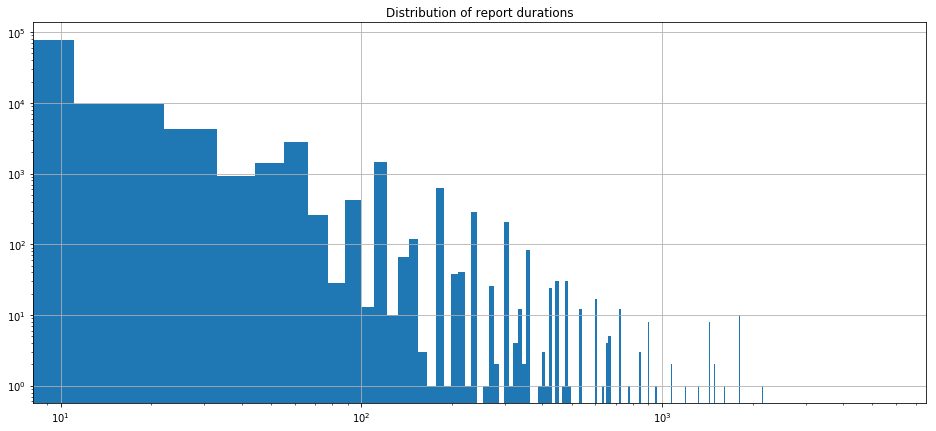

In [14]:
fig, ax = subplots()

df_durations.Duration.hist(ax=ax, bins = 500, figsize=(16,7))
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_title('Distribution of report durations')

<font color='#660066'>
    
## Analysis

We can see that the duration tab follows a power law distribution, which makes sense as most durations would be for a small time frame (like falling meteorites, light flashes, etc). And some of the very long ones could be explained also by the description not matching up to the duration. That is, some people write a very long durration, but it actually means that the occurance happens for short periods over a longer time scale.

<font color='#660066'>
    
We plan on putting this data on the map for a semi-interactive map of durations and whatnot.
We are also going to look into the duration correlation with the report occurance over time, etc.

In [31]:
output = 'sentiment.csv'
df_sentiment = pd.read_csv(output)
df_sentiment.Filename = df_sentiment.Filename.str.replace('-', '/', regex=False)
df_sentiment.Filename = df_sentiment.Filename.str.replace('.txt', '', regex=False)
df_reports = df_reports.merge(df_sentiment, left_on='url', right_on='Filename', how='left')

In [32]:
df_reports

,Duration,Location,State,Occurred,Posted,Reported,Shape,Summary,nuforc_note,link,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,10.000000,Lutz,FL,2018-10-30 23:30:00,11/9/2018,2018-10-30 20:54:00,,['Blinking white light that moved every few se...,[((NUFORC Note: We have attempted to contact ...,[],...,1.54,3.08,0.00,0.0,0.0,0.00,0.00,0.0,12.31,0.00
1,4.500000,Bridgewater,NJ,2011-11-23 00:45:00,6/5/2012,2012-06-05 12:37:00,,['EXPLAINED: Bright lights in Somerset county ...,[((NUFORC Note: Witness elects to remain tota...,[http://www.nj.com/news/index.ssf/2011/11/brig...,...,2.44,1.22,0.61,0.0,0.0,0.61,1.22,0.0,3.66,8.54
2,2.000000,South Fork,CO,2001-10-04 14:00:00,3/21/2003,2001-10-15 13:27:00,Cigar,"['Shinny Cigar shape in sky on clear day.', 'D...",[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.000000,Hattiesburg,MS,2014-12-17 20:00:00,8/13/2015,2015-08-09 21:11:00,Triangle,['I saw a triangular UFO with red and white li...,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.125000,LaBelle,FL,2014-12-17 17:19:00,12/18/2014,2014-12-17 18:21:00,Triangle,"['White Triangle in South Florida', 'My co-wor...",[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.500000,Maryland Heights,MO,2014-12-16 17:15:00,12/18/2014,2014-12-16 21:33:00,Triangle,['I was driving on my motorcycle on hwy 141 at...,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,Fort Mill,SC,2014-12-16 17:00:00,12/18/2014,2014-12-16 19:01:00,Triangle,['Triangular craft with lights are corners wit...,[((NUFORC Note: Witness elects to remain tota...,[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5.000000,Lenoir City,TN,2014-12-15 05:30:00,1/7/2015,2014-12-28 18:11:00,Triangle,['My wife and I were on our way to work. She s...,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,30.000000,Augusta,GA,2014-12-14 22:00:00,12/18/2014,2014-12-14 19:16:00,Triangle,"[""I was coming home from work when I noticed 3...",[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10.000000,Meriden,CT,2014-12-14 09:50:00,12/18/2014,2014-12-14 19:30:00,Triangle,['1 Very Large triangle shaped 5 lights around...,[],[],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<font color='#660066'>
    
## Scrapping Air-base, rocket launch locations
Done

<font color='#660066'>

# Getting some weather data in this place

In [140]:
!ls data/weather/

StormEvents_details-ftp_v1.0_d1950_c20170120.csv.gz
StormEvents_locations-ftp_v1.0_d1996_c20170717.csv.gz


In [129]:
storm_folder = 'data/weather/'

In [143]:
storms = pd.read_csv(storm_folder+'StormEvents_details-ftp_v1.0_d1950_c20170120.csv.gz')
#storms = pd.read_csv(storm_folder+'StormEvents_locations-ftp_v1.0_d1996_c20170717.csv.gz')

In [145]:
storms.shape

(223, 51)